In [4]:
# Importing data analysis libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading and exploring the Data**

Now we will read our training and testing data using pd.read_csv, and take a first look using describe() function.

In [5]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

# take a first look
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Data Analysis **

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S


Now we have an idea with what kinds(type) of data we're working with. Let's look a summary of the training dataset

In [8]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barah, Mr. Hanna Assi",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## ** Data Visualization **

Time to visualize our data and look more deeply into some predictions.

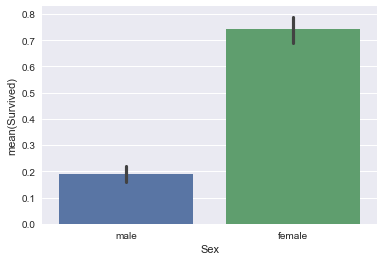

In [9]:
sns.barplot(x='Sex', y='Survived', data=train)

In [10]:
# Let's print the average of females vs. males who survive

In [11]:
train[train['Sex'] == 'male']['Survived'].mean() 

0.18890814558058924

In [12]:
train[train['Sex'] == 'female']['Survived'].mean()

0.7420382165605095

In [13]:
# Pclass Feature

Prediction. 
People with which class have survived the most ?
* Pclass = 1
* Pclass = 2
* Pclass = 3

Percentage of Pclass = 1 who survived: 62.962962963
Percentage of Pclass = 2 who survived: 47.2826086957
Percentage of Pclass = 2 who survived: 24.2362525458


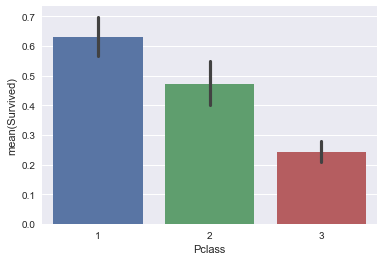

In [14]:
sns.barplot(x="Pclass", y='Survived', data=train)

# print the percentage of people by Pclass that had survived
print('Percentage of Pclass = 1 who survived:', train[train['Pclass'] == 1]['Survived'].value_counts(normalize = True)[1]*100)

print('Percentage of Pclass = 2 who survived:', train[train['Pclass'] == 2]['Survived'].value_counts(normalize = True)[1]*100)

print('Percentage of Pclass = 2 who survived:', train[train['Pclass'] == 3]['Survived'].value_counts(normalize = True)[1]*100)

People with higher socioeconomic class had a higher rate of survival! (62,9 %)

In [15]:
# SibSp Feature

Percentage of SibSp = 0 who survived: 34.5394736842
Percentage of SibSp = 1 who survived: 53.5885167464
Percentage of SibSp = 2 who survived: 46.4285714286


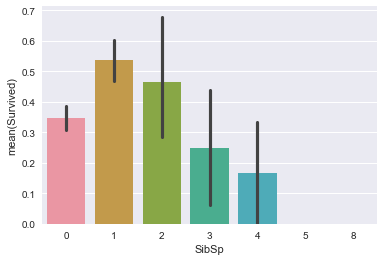

In [16]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

print('Percentage of SibSp = 0 who survived:', train[train['SibSp'] == 0]['Survived'].value_counts(normalize = True)[1]*100)
print('Percentage of SibSp = 1 who survived:', train[train['SibSp'] == 1]['Survived'].value_counts(normalize = True)[1]*100)
print('Percentage of SibSp = 2 who survived:', train[train['SibSp'] == 2]['Survived'].value_counts(normalize = True)[1]*100)

So it's better when travel to take with you your spouse or sibling. Because people with no siblings or spouses were less to likely to survive than those with one or two :)

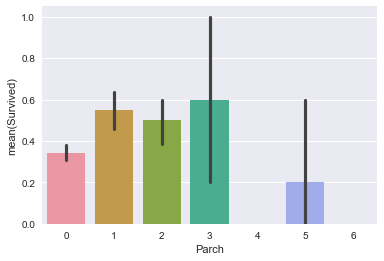

In [17]:
# Parch Feature
sns.barplot(x='Parch', y='Survived', data=train)
plt.show()

As previous.

In [18]:
# Age Feature

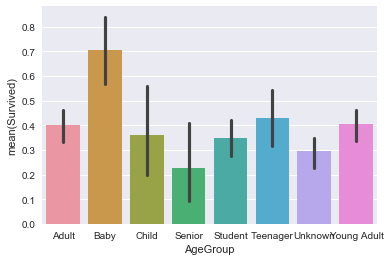

In [19]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult','Adult', 'Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)

# draw a bar plot of Age vs. survival
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show()

In [20]:
# Cabin Feature

 people with recorded cabin numbers are of higher socioeconomic class, and thus more likely to survive

Percentage of CabinBool = 0 who survived: 29.9854439592
Percentage of CabinBool = 1 who survived: 66.6666666667


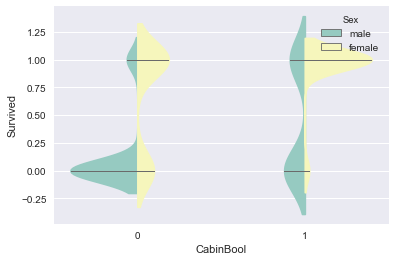

In [21]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

# Let's calculate the percentages of cabibool vs. survived
print('Percentage of CabinBool = 0 who survived:', train[train['CabinBool'] == 0]['Survived'].value_counts(normalize = True)[1]*100)
print('Percentage of CabinBool = 1 who survived:', train[train['CabinBool'] == 1]['Survived'].value_counts(normalize = True)[1]*100)

# draw a violin plot of CabinBool vs. survival
sns.violinplot(x="CabinBool", y="Survived", hue="Sex", data=train,
               split=True, inner="stick", palette="Set3");
plt.show()

In [22]:
# Cleaning the data

Now we will clean our data, it will be unnecessary information and missing values.

In [23]:
# Exploring the test data. Looking for missing values

In [24]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Bjorklund, Mr. Ernst Herbert",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,100,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


* We have in total of 418 passengers
* Some values are missing
* Age feature, AgeGroup


### Cabin Feature

In [25]:
#
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
CabinBool        0
dtype: int64


In [26]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature

In [27]:
# any useful information, so we will drop it
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### Embarked Feature

In [28]:
# Let's fill in the missing values in the Embarked feature
print('Number of people embarking in Southampton (S):')
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q):')
queenstown = train[train['Embarked'] == 'Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


From,the majority of people embarked in Southampton (S). 

In [29]:
train = train.fillna({'Embarked': 'S'})

### Age Feature

Next we'll fill in the missing values in the Age feature. Using Imputation.

In [30]:


# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

# titanic_target = train.AgeGroup
# titanic_predictors = train.drop(['AgeGroup'], axis=1)

# titanic_numeric_predictors = titanic_predictors.select_dtypes(exclude=['object'])

#### Create Function to Measure Quality of An Approach

We have no reason dividing our data to test and training. Because it has dome before us. So, next step is tp load function - *score_dataset(X_train, X_test, y_train, y_test)* to compare the quality of different approaches to missing values. This function reports the out-of-sample MAE score from a RandomForest

In [31]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split


In [32]:
# X_train, X_test, y_train, y_test = train_test_split(titanic_numeric_predictors,
#                                                    titanic_target,
#                                                    train_size=0.7,
#                                                    test_size=0.3,
#                                                    random_state=0)

# def score_dataset(X_train, X_test, y_train, y_test):
#     model = RandomForestRegressor()
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     return mean_absolute_error(y_test, preds)

#### Get Model Score from Dropping Columns with Missing Values

In [33]:
# cols_with_missing = [col for col in X_train.columns
#                         if X_train[col].isnull().any()]
# reduced_X_train = X_train.dropna(cols_with_missing)
# reduced_X_test = X_test.dropna(cols_with_missing)
# print("Mean Absolute Error from dropping columns with Missing Values:")
# print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

-----

### Age Feature

Next we'll fill in the missing values in the Age feature. Using not the Imputation(it isn't working) and i have no idea why?. But use another variant

In [34]:
# create a combined group of both datasets
combine = [train, test]

# extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [36]:
# map each of the title groups to a numerical value
title_mapping = {'Mr': 1, 'Miss': 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [37]:
# fill missing age with mode age group for each title
mr_age = train[train['Title'] == 1]['AgeGroup'].mode() # Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: 'Student', 3: 'Adult', 4: 'Baby', 
                     5: 'Adult', 6: 'Adult'}

train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
test = test.fillna({"Age": test["Title"].map(age_title_mapping)})


# for x in range(len(train['AgeGroup'])):
#     if train['AgeGroup'][x] == 'Unknown':
#         train['AgeGroup'][x] == age_title_mapping[T]

Now we've filled in the missing values. I tried Imputation but it didn't work(I will be working on a better way for predicting missing age values).

In [38]:
# time to map each age group to a numerical value.

In [39]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

#### Name Feature
We can drop name feature, since it containg no information, useful for us

In [40]:
# drop name feature
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

#### Sex Feature

In [41]:
# map each Sex value to a numerical value
sex_mapping = {'male': 1, 'female': 2}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,1,1,0,7.2500,S,4.0,0,1
1,2,1,1,2,1,0,71.2833,C,6.0,1,3
2,3,1,3,2,0,0,7.9250,S,5.0,0,2
3,4,1,1,2,1,0,53.1000,S,5.0,1,3
4,5,0,3,1,0,0,8.0500,S,5.0,0,1


#### Embarked Feature
Map each Embarked feature to a numerical value, as previous above

In [42]:
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,1,1,0,7.2500,1,4.0,0,1
1,2,1,1,2,1,0,71.2833,2,6.0,1,3
2,3,1,3,2,0,0,7.9250,1,5.0,0,2
3,4,1,1,2,1,0,53.1000,1,5.0,1,3
4,5,0,3,1,0,0,8.0500,1,5.0,0,1


#### Fare Feature
Let's separate the fare values into groups.Code taken from this https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner kernel

In [46]:
# fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass = test['Pclass'][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
# map Fare values into groups pf numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

# drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [49]:
# checking train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,1,1,0,1,4.0,0,1,1
1,2,1,1,2,1,0,2,6.0,1,3,4
2,3,1,3,2,0,0,1,5.0,0,2,2
3,4,1,1,2,1,0,1,5.0,1,3,4
4,5,0,3,1,0,0,1,5.0,0,1,2


In [50]:
# checking test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,1,0,0,3,4.0,0,1,1
1,893,3,2,1,0,1,6.0,0,3,1
2,894,2,1,0,0,3,5.0,0,1,2
3,895,3,1,0,0,1,5.0,0,1,2
4,896,3,2,1,1,1,5.0,0,3,2


### Choosing the Best Model

I will use part of our training data (30% in this case) to test the accuracy of our different models.

In [51]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.30, random_state = 0)

----

#### What models we will be testing ?
* I will be testing following models with my training data:
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

For each model we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [50]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

ValueError: could not convert string to float: 'Adult'